In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')
import re
from gensim.models import word2vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d yutkin/corpus-of-russian-news-articles-from-lenta

 98% 572M/584M [00:10<00:00, 84.9MB/s]
100% 584M/584M [00:10<00:00, 58.7MB/s]


In [ ]:
!unzip lenta-ru-news.zip

Archive:  lenta-ru-news.zip
  inflating: lenta-ru-news.csv       


In [ ]:
df=pd.read_csv("lenta-ru-news.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


Analytics of dataset


In [ ]:
df.shape

(800975, 6)

In [ ]:
df.isnull().sum()

url          0
title        0
text         5
topic    62002
tags     27219
date         0
dtype: int64

In [ ]:
df.isna().sum()

url          0
title        0
text         5
topic    62002
tags     27219
date         0
dtype: int64

In [ ]:
df_cleaned=df.dropna(how='any')
df_cleaned.shape

(712654, 6)

In [ ]:
df_cleaned.isna().sum()

url      0
title    0
text     0
topic    0
tags     0
date     0
dtype: int64

In [ ]:
df_t=df_cleaned.groupby(by="topic").count()
df_t

,url,title,text,tags,date
topic,,,,,
69-я параллель,1268,1268,1268,1268,1268
Библиотека,65,65,65,65,65
Бизнес,7375,7375,7375,7375,7375
Бывший СССР,51370,51370,51370,51370,51370
Дом,21734,21734,21734,21734,21734
Из жизни,27513,27513,27513,27513,27513
Интернет и СМИ,44421,44421,44421,44421,44421
Крым,666,666,666,666,666
Культпросвет,340,340,340,340,340


In [ ]:
df_sorted= df_t.sort_values(by="title", ascending=False)
df_sorted

,url,title,text,tags,date
topic,,,,,
Россия,155004,155004,155004,155004,155004
Мир,136620,136620,136620,136620,136620
Экономика,76423,76423,76423,76423,76423
Спорт,57894,57894,57894,57894,57894
Культура,53530,53530,53530,53530,53530
Наука и техника,53136,53136,53136,53136,53136
Бывший СССР,51370,51370,51370,51370,51370
Интернет и СМИ,44421,44421,44421,44421,44421
Из жизни,27513,27513,27513,27513,27513


In [ ]:
index= df_sorted.index.values

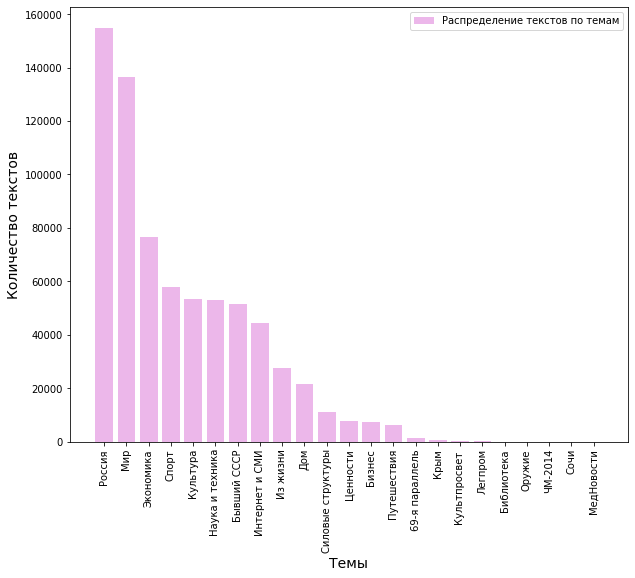

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(x=index, height=df_sorted["title"], alpha = 0.5, color = "#DA70D6", label = "Распределение текстов по темам")
plt.legend()
plt.xlabel ("Темы", size=14)
plt.ylabel ("Количество текстов", size=14)
plt.xticks(rotation=90)

plt.show()

Preparation of the dataset: cleaning, removing of stop words.

In [ ]:
df_cleaned = df_cleaned.set_index(['topic'])
df_cleaned.head()


,url,title,text,tags,date
topic,,,,,
Библиотека,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Первая мировая,1914/09/16
Библиотека,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Первая мировая,1914/09/16
Библиотека,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Первая мировая,1914/09/17
Библиотека,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Первая мировая,1914/09/17
Библиотека,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Первая мировая,1914/09/18


In [ ]:
df_work= df_cleaned.loc[df_cleaned.index.isin(['Экономика','Мир', "Россия"])]
df_work. groupby(df_work.index).count()

,url,title,text,tags,date
topic,,,,,
Мир,136620,136620,136620,136620,136620
Россия,155004,155004,155004,155004,155004
Экономика,76423,76423,76423,76423,76423


In [ ]:
articles= df_work.drop(["url", "title", "tags", "date"], axis=1)

In [ ]:
articles

,text
topic,
Россия,Как стало известно агентству Ассошиэйтед Пресс...
Россия,В зале игровых автоматов в третьем ярусе подзе...
Россия,Япония приняла решение разморозить кредиты Рос...
Мир,Британцы отмечают сегодня скорбную дату - втор...
Россия,В понедельник директор департамента внешних св...
...,...
Мир,Федеральный суд в техасском городе Форт-Уорт о...
Мир,Россия призвала Китай принять участие в перего...
Россия,Президент России Владимир Путин организовал дл...


In [ ]:
def cleaned_df(df, field):
 df[field] = df[field].str.lower()
 df[field] = df[field].str.strip("\t")
 df[field] = df[field].str.replace(r"@\S+ http\S+", "")
 df[field] = df[field].str.replace(r"[^А-Яа-я() A-Za-z()\'\-\`\"\_\n]", " ")
 df[field] = df[field].str.replace(r"\(.*\)","")
 df[field] = df[field].str.replace(r'"' ," ")
 df[field] = df[field].str.replace(r'-' ," ")
 return df

In [ ]:
cleaned_df(articles, "text")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,text
topic,
Россия,как стало известно агентству ассошиэйтед пресс...
Россия,в зале игровых автоматов в третьем ярусе подзе...
Россия,япония приняла решение разморозить кредиты рос...
Мир,британцы отмечают сегодня скорбную дату втор...
Россия,в понедельник директор департамента внешних св...
...,...
Мир,федеральный суд в техасском городе форт уорт о...
Мир,россия призвала китай принять участие в перего...
Россия,президент россии владимир путин организовал дл...


In [ ]:
stops=set(stopwords.words('russian'))
articles["text"] = articles["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops)]))
print(articles["text"])

In [ ]:
articles.to_csv('articles.csv')

In [ ]:
df=pd.read_csv("articles.csv")

Training and classification.

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(df['text'], df['topic'], test_size=0.2)
print(y_train.shape)

(275628,)


In [ ]:
print(y_test.shape)

(73610,)


In [ ]:
classifier = SGDClassifier(random_state=1)
vectorizer=CountVectorizer()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(X_train, y_train)
preds = model.predict(X_test)


In [ ]:
SDG_simple_Count_score=accuracy_score(preds, y_test)
SDG_simple_Count_presision =precision_score(preds, y_test, average="weighted")
print(SDG_simple_Count_score)
print(SDG_simple_Count_presision)
print(metrics.confusion_matrix(preds, y_test)) 


0.9122945252003803
0.9124208354433959
[[25202  2304   534]
 [ 1774 27801   793]
 [  379   672 14151]]


In [ ]:
print(metrics.classification_report(preds, y_test))

              precision    recall  f1-score   support

         Мир       0.92      0.90      0.91     28040
      Россия       0.90      0.92      0.91     30368
   Экономика       0.91      0.93      0.92     15202

    accuracy                           0.91     73610
   macro avg       0.91      0.92      0.91     73610
weighted avg       0.91      0.91      0.91     73610



[[25037  1951   364]
 [ 2185 28158   708]
 [  561   791 13855]]


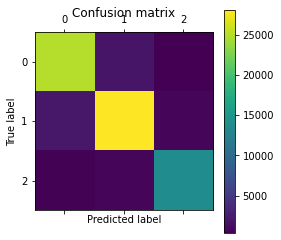

In [ ]:
cm = confusion_matrix(y_test, preds)

print(cm)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
model = word2vec.Word2Vec(df['text'], size=700, window=3, workers=4)
w2v = dict(zip(model.wv.index2word, model.wv.vectors))

In [ ]:
class mean_vectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(w2v.values())))

    def fit(self, X):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

word2vec

In [ ]:
model = word2vec.Word2Vec(df['text'], size=700, window=3, workers=4)
w2v = dict(zip(model.wv.index2word, model.wv.vectors))

In [ ]:
class mean_vectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(w2v.values())))

    def fit(self, X):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [ ]:
data_mean=mean_vectorizer(w2v).fit(df["text"]).transform(df["text"])
data_mean.shape

(368047, 700)

In [ ]:
Xtr, Xval, ytr, yval = train_test_split(data_mean, df['topic'], test_size=0.2, random_state=1)

In [ ]:
model = SGDClassifier().fit(Xtr, ytr)
pred = model.predict(Xval)

In [ ]:
SDG_simple_Count_score=accuracy_score(pred, yval)
SDG_simple_Count_presision =precision_score(pred, yval, average="weighted")
print(SDG_simple_Count_score)
print(SDG_simple_Count_presision)
print(metrics.classification_report(pred, yval))

0.893085178644206
0.8933802239992948
              precision    recall  f1-score   support

         Мир       0.91      0.88      0.89     28161
      Россия       0.88      0.90      0.89     30574
   Экономика       0.89      0.91      0.90     14875

    accuracy                           0.89     73610
   macro avg       0.89      0.90      0.89     73610
weighted avg       0.89      0.89      0.89     73610



Features reduction

In [ ]:
classifier = SGDClassifier(random_state=1)
vectorizer=CountVectorizer()

model = Pipeline([
               
    ('vectorizer', vectorizer),
    ("svd", TruncatedSVD(n_components=200, n_iter=7, random_state=42)), 
    ('classifier', classifier)
])

model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
SDG_simple_Count_score=accuracy_score(preds, y_test)
SDG_simple_Count_presision =precision_score(preds, y_test, average="weighted")
print(SDG_simple_Count_score)
print(SDG_simple_Count_presision)
print(metrics.classification_report(preds, y_test)) 

0.8718108952587964
0.8724857216938121
              precision    recall  f1-score   support

         Мир       0.89      0.86      0.87     28463
      Россия       0.85      0.89      0.87     29889
   Экономика       0.87      0.87      0.87     15258

    accuracy                           0.87     73610
   macro avg       0.87      0.87      0.87     73610
weighted avg       0.87      0.87      0.87     73610

